In [21]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import integrate
from itertools import permutations
from itertools import combinations
from itertools import combinations_with_replacement

# Calculo de probabilidad

# 1

a)

In [22]:
N = 100000

def proba(N,m,l,t):
    cartas = np.zeros(m)
    cartas[0:l] = 1
    n = 0
    for i in range(N):
        np.random.shuffle(cartas)
        a = cartas[0:t]
        if sum(a) == float(t):
            n +=1
    return n/N

proba1 = proba(N,50,11,3)
proba2 = proba(N,49,10,2)
proba3 = proba(N,48,9,1)
"a- ",proba1,"b- ",proba2,"c- ",proba3


('a- ', 0.00802, 'b- ', 0.03835, 'c- ', 0.18773)

2)

In [23]:
inoculados = np.zeros(100)
no_inoculado = np.zeros(100)
inoculados[0:60] = 1
inoculados[0:12] = 2
no_inoculado[0:60] = 1
no_inoculado[0:54] = 2

N = 1000
n = 0

for i in range(N):
    np.random.shuffle(inoculados)
    np.random.shuffle(no_inoculado)
    if inoculados[0] > 1.1 or no_inoculado[0] > 1.1:
        n += 1
        
print(n/N)


0.601


# Distribución de probabilidad discreta

# 1

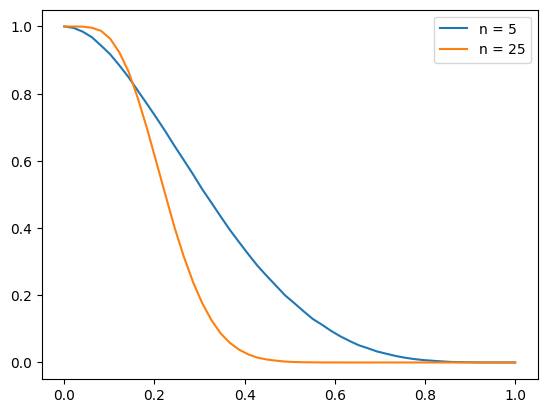

In [24]:
def probaBinomial(n,acep,p,N):
    
    probabilidad = np.zeros(len(p))
    
    for i in range(len(p)):
        count = 0
        lista = np.random.binomial(n,p[i],N)
        for j in lista:
            if j <= acep:
                count += 1
        pro = count/N 
        probabilidad[i] = pro
        
        
    return probabilidad
        
N = 100000
M = 50
p = np.linspace(0,1,M)


proba1 = probaBinomial(5,1,p,N)
proba2 = probaBinomial(25,5,p,N)
plt.plot(p,proba1, label= "n = 5")
plt.plot(p,proba2, label= "n = 25")
plt.legend()

a- Preferiría el plan de muestreo con mayor cantidad de piezas (n=25), ya que, la distribución tendrá una menor varianza, por lo que, a rangos bajos de probabilidad de pieza defectuosa, como el rango de 0 a 0.1, la probabilidad de aceptación es mucho mayor.

b- Como ya se explico, la varianza aumentará con la cantidad de piezas, por ende, para tener mayor probabilidad de aceptacion con tal probabilidad de piezas defectuosa, es mejor escoger el muestreo de n = 5.

# 2

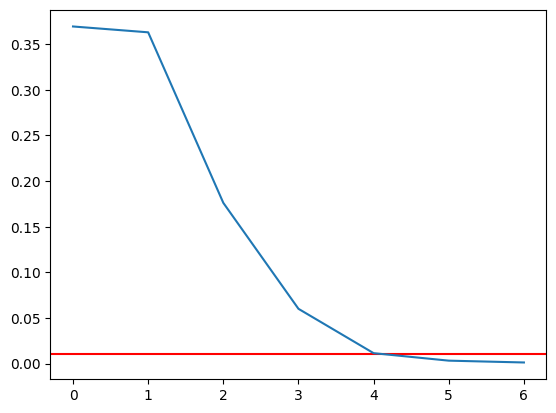

In [25]:
def probaPoisson(lamda,casos,N):
    
    probabilidad = np.zeros(len(casos))
    
    for i in range(len(casos)):
        count = 0
        lista = np.random.poisson(lamda,N)
        for j in lista:
            if j == casos[i]:
                count += 1
        pro = count/N 
        probabilidad[i] = pro
         
    return probabilidad
        
N = 10000
lamda = 1
n = 6
casos = range(n+1)

proba1 = probaPoisson(lamda,casos,N)

plt.axhline(y = 0.01, color = "red")
plt.plot(casos,proba1)

a- En la grafica podemos ver que el menor valor de n para que haya una probabilidad menor de 0.01 es n = 5

b-

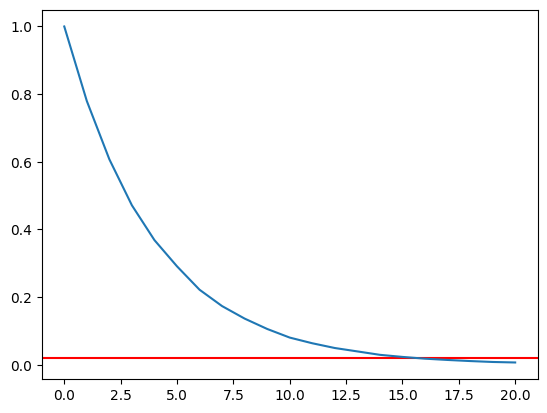

In [26]:
N = 100000
lam = 1/4
n = 20
casos = range(n+1)
probabilidad = np.zeros(n+1)

for i in range(len(casos)):
    lamda = lam*i
    count = 0
    lista = np.random.poisson(lamda,N)
    for j in lista:
        if j == 0:
            count += 1
    pro = count/N 
    probabilidad[i] = pro

plt.axhline(y = 0.02, color = "red")
plt.plot(casos,probabilidad)

In [27]:
probabilidad[16]

0.01801

Las horas minimas para 0 desconecciones tenga 0.02 de probabilidad, es de 17 horas

c-

In [28]:
lamda = 1
N = 10000
p = np.array([lambda N: np.random.poisson(lamda,N),lambda N: np.random.poisson(lamda,N),lambda N: np.random.poisson(lamda,N)])
count= 0
for i in range(N):
    proba = p[0](N)[0],p[0](N)[0],p[0](N)[0]
    if sum(proba) == 1:
        count += 1
        
count/N

0.1531

d-

In [29]:
lamda = 1
N = 10000
p = np.array([lambda N: np.random.poisson(lamda,N),lambda N: np.random.poisson(lamda,N),lambda N: np.random.poisson(lamda,N)])
count= 0
for i in range(N):
    proba = p[0](N)[0],p[0](N)[0],p[0](N)[0]
    if sum(proba) == 3:
        count += 1
        
count/N

0.2269

# 3

1

In [30]:
def probabilidad(a,b):

    if a < -1:
        a = -1

    if b > 2:
        b = 2

    if a > 2:
        return 0
    
    funcion1= lambda x: (x**2)/3
    return integrate.quad(funcion1,a,b)[0]

prob1= probabilidad(0,1)
prob2= probabilidad(1,2)

print(prob1)
print(prob2)

0.11111111111111112
0.7777777777777778


2

a

In [31]:
media=78
varianza=np.sqrt(36)


def normal(x,media,varianza):
    return (1 / np.sqrt(2 * np.pi * varianza**2)) * np.exp((-1 / 2 * ((x - media) / varianza)**2))

def probabilidadNormal(a,b,media,varianza):
    funcion1= lambda x: normal(x,media,varianza)
    return integrate.quad(funcion1,a,b)[0]

norma= probabilidadNormal(float('-inf'),100,media,varianza)- probabilidadNormal(float('-inf'),0,media,varianza)

def probabilidades(a,b,media,varianza):
    pop=probabilidadNormal(a,b,media,varianza) 
    return pop/norma

prob1= probabilidades(72,100,media,varianza)
prob1

0.8413252502748652

b

In [32]:
def iteranota(til, error= 1e-4):
    punto=0
    if (til) < 0.5:
        arreglo= np.arange(0, media, 0.001)
        for i in arreglo:
            area= probabilidades(0,i,media,varianza)
            if np.isclose(area, til, atol= error):
                punto= i
                break

    else:
        arreglo= np.arange(media, 100, 0.001)
        for i in arreglo:
            area= probabilidades(0,i,media,varianza)
            if np.isclose(area, til, atol= error):
                punto= i
                break

    return punto

prob= iteranota(0.9)
print(prob)

85.68200000003668


c

In [33]:
porcentaje= (100-28.1)/100
pasar= iteranota(porcentaje)
pasar

81.4760000000166

d

In [34]:
limite= iteranota(0.25)
estudiantes= probabilidades(limite,100,media,varianza)
estudiantes

0.7500784630624218

e

In [35]:
prob72= probabilidades(72,100,media,varianza)
prob84= probabilidades(84,100,media,varianza)
proba= prob72*prob84
print(proba)

0.1333936902261798


# 4

In [36]:
Dict1 = {'A': 0, 'C': 1, 'G': 2, 'T': 3}
Dict2 = {'U': 0, 'G': 1, 'C': 2, 'A': 3}

States1 = np.array([0,1,2,3]) 
Prior =  np.array([0.25, 0, 0.5, 0.25])

T= np.array([[0.4, 0.25, 0.3, 0.1], [0.2, 0.25, 0.3, 0.1], [0.2, 0.25, 0.1, 0.1], [0.2, 0.25, 0.3, 0.7]])
E= np.array([[0.8, 0, 0, 0.2], [0.05, 0.9, 0.1, 0.1], [0.05, 0.1, 0.9, 0], [0.1, 0, 0, 0.7]])

gen=['T', 'G', 'C', 'T', 'C', 'A', 'A', 'A']
traducido= ['A', 'C', 'G', 'A', 'G', 'U', 'U', 'U']

def traducir(cadena, dicc):
    devolver=[]
    for i in cadena:
        devolver.append(dicc[i])
    return devolver

def GetProb1(T,State,Prior):
    
    n = len(State)
    p = 1.
    
    p *= Prior[State[0]]
    
    for i in range(n-1):
        p *= T[ State[i+1], State[i]  ]
        
    return p


def GetProb_2(T,E,Obs,State,Prior):
    
    n = len(Obs)
    p = 1.
    
    p *= Prior[State[0]]

    for i in range(n-1):
        p *= T[ State[i+1], State[i]  ]
        
    for i in range(n):
        p *= E[ Obs[i], State[i] ]
        
    return p

genoma= traducir(gen, Dict1)
tradu= traducir(traducido, Dict2)
prob1= GetProb1(T,genoma,Prior)
prob2= GetProb_2(T,E,tradu,genoma,Prior)
print(prob1)
print(prob2)


7.500000000000001e-06
1.3716864000000001e-06
